<a href="https://colab.research.google.com/github/milieureka/redback-orion/blob/main/Crowd_Monitoring/Small%20object%20detection/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install lib
!pip install -q torch sahi yolov8 ultralytics numpy opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 194.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 3.8 MB/s eta 0:00:00
   

In [2]:
# Import lib
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

# Create model
from sahi import AutoDetectionModel

# Ultil to read, dowwnload image
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url

# Prediction
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.prediction import visualize_object_predictions

# Ultils
from IPython.display import Image
from numpy import asarray
import cv2

In [3]:
# Download weights YOLOV8
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

In [7]:
# Download sample data
download_from_url('https://c8.alamy.com/comp/2A68664/birds-eye-view-of-a-crowd-standing-close-together-in-a-grassy-area-on-a-sunny-day-during-a-college-orientation-week-event-and-looking-up-toward-the-camera-at-the-johns-hopkins-university-baltimore-maryland-september-4-2006-from-the-homewood-photography-collection-2A68664.jpg', 'demo_data/crowd.jpeg')
#download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [17]:
# Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type = "yolov8",
    model_path = yolov8_model_path,
    confidence_threshold = 0.3,
    device = "cpu"
)

### Example

In [18]:
# Dectect without SAHI
base_result = get_prediction("/content/demo_data/crowd.jpeg", detection_model)

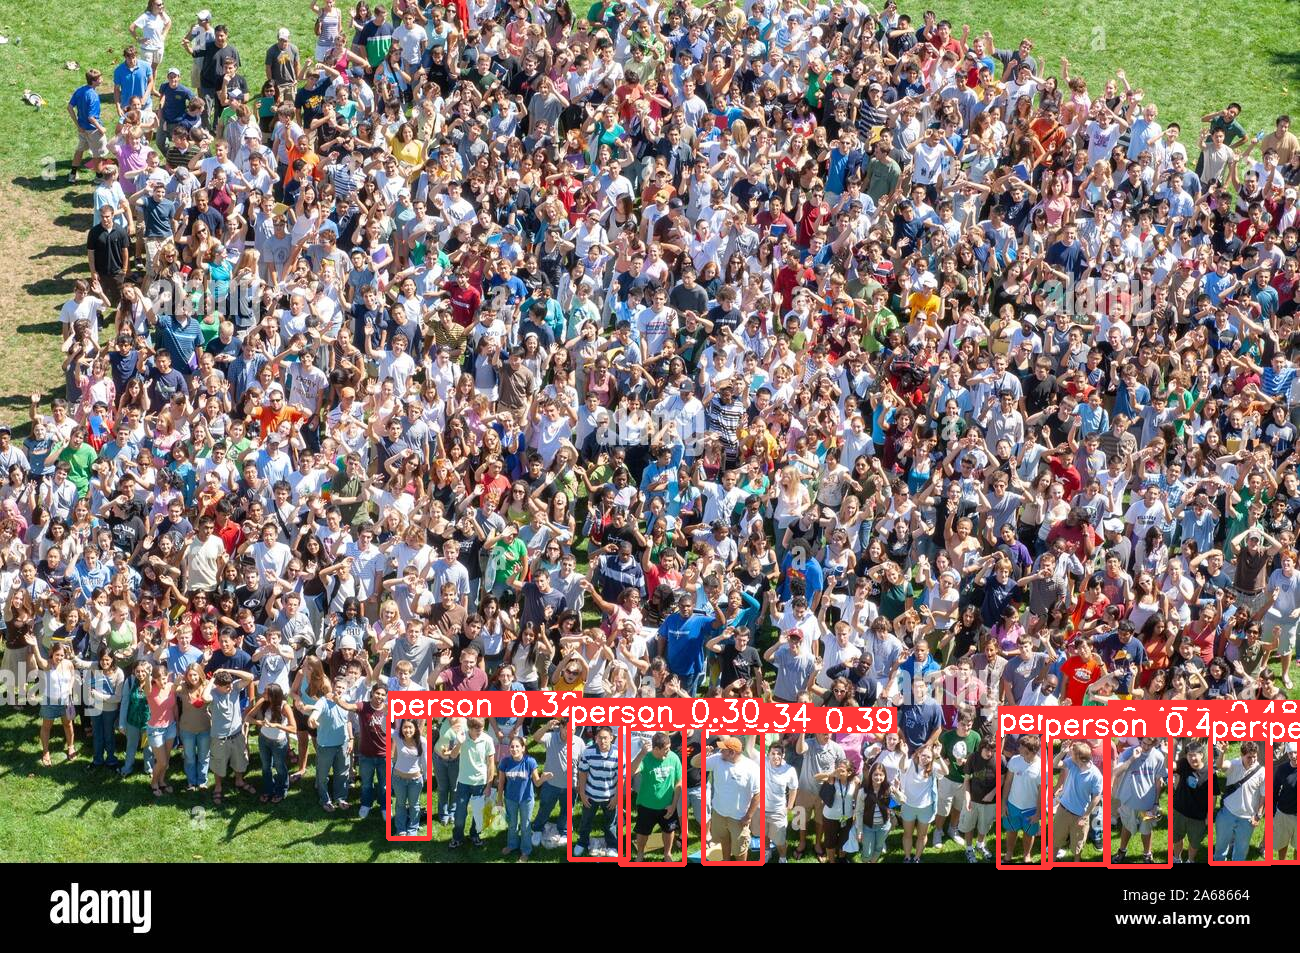

In [19]:
# Show result
base_result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

In [29]:
# Try with SAHI
sahi_result = get_sliced_prediction(
    "https://c8.alamy.com/comp/2A68664/birds-eye-view-of-a-crowd-standing-close-together-in-a-grassy-area-on-a-sunny-day-during-a-college-orientation-week-event-and-looking-up-toward-the-camera-at-the-johns-hopkins-university-baltimore-maryland-september-4-2006-from-the-homewood-photography-collection-2A68664.jpg",
    detection_model = detection_model,
    slice_height = 195,
    slice_width = 195,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,
)

Performing prediction on 54 slices.


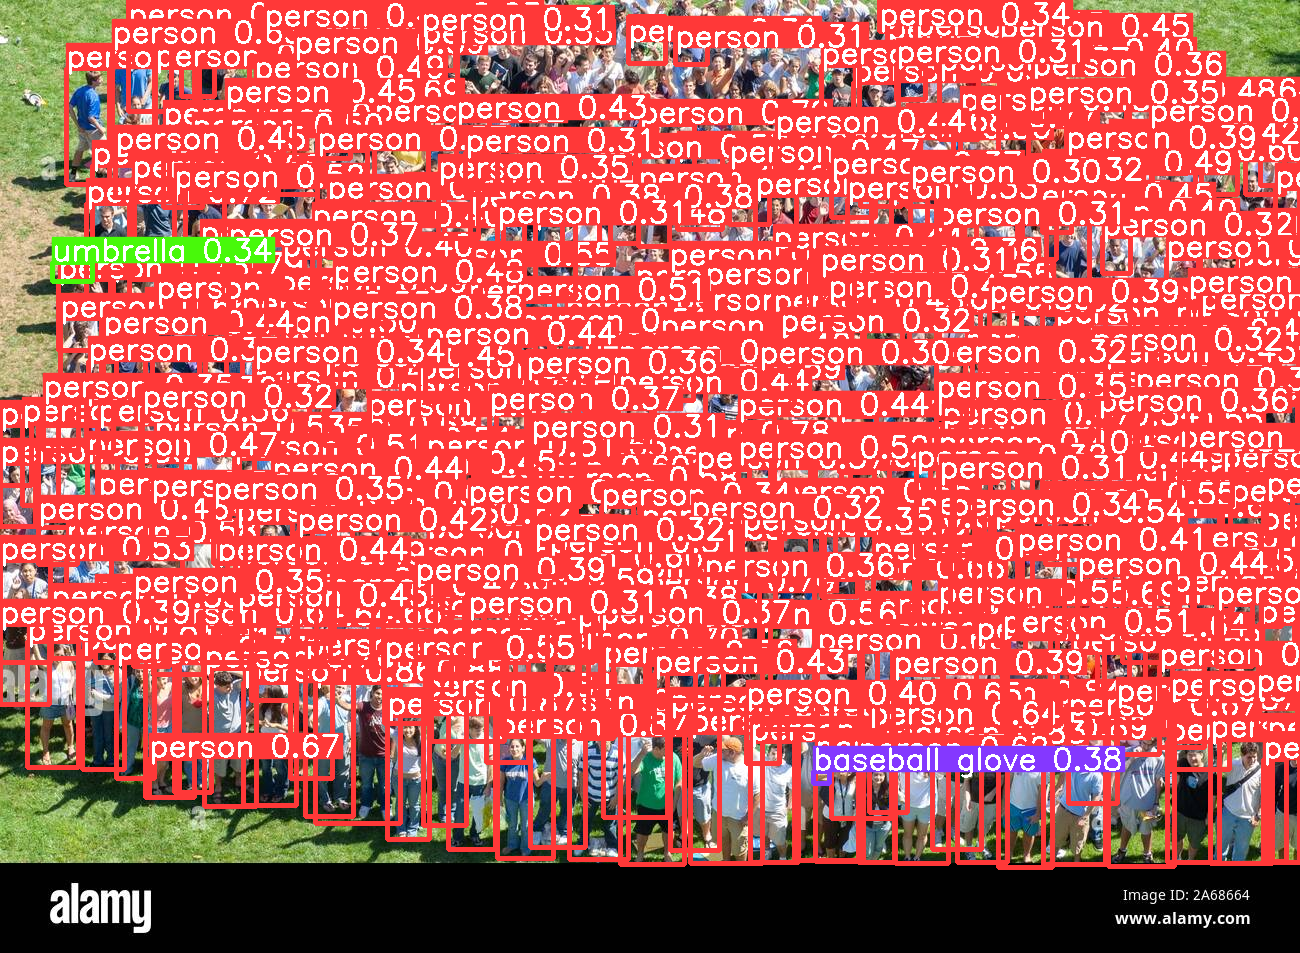

In [30]:
# Show result
sahi_result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")